(1000,)
(1000, 20)
(1000, 20)
(1000,)


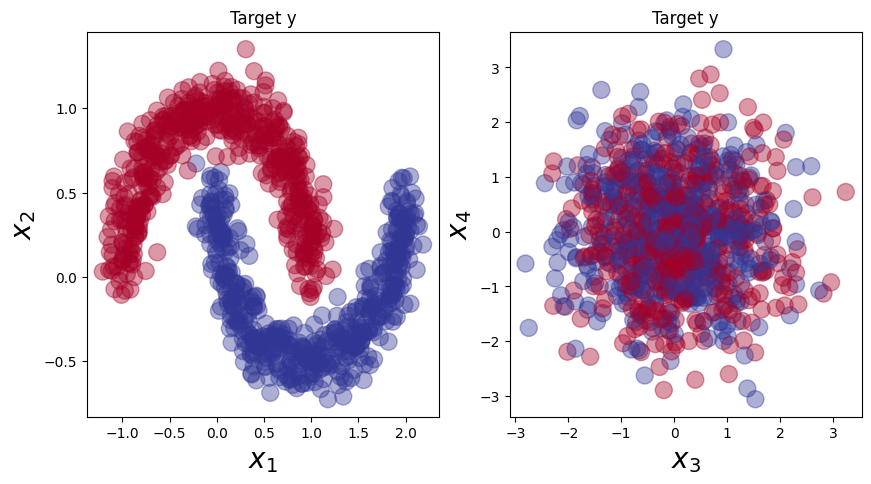

Epoch: 1000: loss=0.365355 valid_loss=0.241608
Epoch: 2000: loss=0.109383 valid_loss=0.044014
Epoch: 3000: loss=0.068725 valid_loss=0.037317
Epoch: 4000: loss=0.063851 valid_loss=0.037355
Epoch: 5000: loss=0.062515 valid_loss=0.037811
Epoch: 6000: loss=0.062986 valid_loss=0.038074
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.842487   1.8589085 -1.6161307 -1.6145318 -1.617061  -1.616897
 -1.6158221 -1.616969  -1.617343  -1.6164949 -1.6158333 -1.621201
 -1.6158097 -1.5886846 -1.6182066 -1.617785  -1.6169064 -1.6171789
 -1.616576  -1.6166148]


In [16]:
from stg import STG
import numpy as np
import scipy.stats # for creating a simple dataset 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import torch

import numpy as np
import math
from sklearn.datasets import make_moons
from scipy.stats import norm


# Create a simple dataset
def create_twomoon_dataset(n, p):
    relevant, y = make_moons(n_samples=n, shuffle=True, noise=0.1, random_state=None)
    print(y.shape)
    noise_vector = norm.rvs(loc=0, scale=1, size=[n,p-2])
    data = np.concatenate([relevant, noise_vector], axis=1)
    print(data.shape)
    return data, y

n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_twomoon_dataset(n_size,p_size)
print(X_data.shape)
print(y_data.shape)
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=matplotlib.colormaps['RdYlBu'])
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=matplotlib.colormaps['RdYlBu'])
ax[1].set_xlabel('$x_3$',fontsize=20)
ax[1].set_ylabel('$x_4$',fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)


args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu") 
feature_selection = True
model = STG(task_type='classification',input_dim=X_train.shape[1], output_dim=2, hidden_dims=[60, 20], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.5, random_state=1, device=device) 

model.fit(X_train, y_train, nr_epochs=6000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

print(model.get_gates(mode='prob'))

print(model.get_gates(mode='raw') )


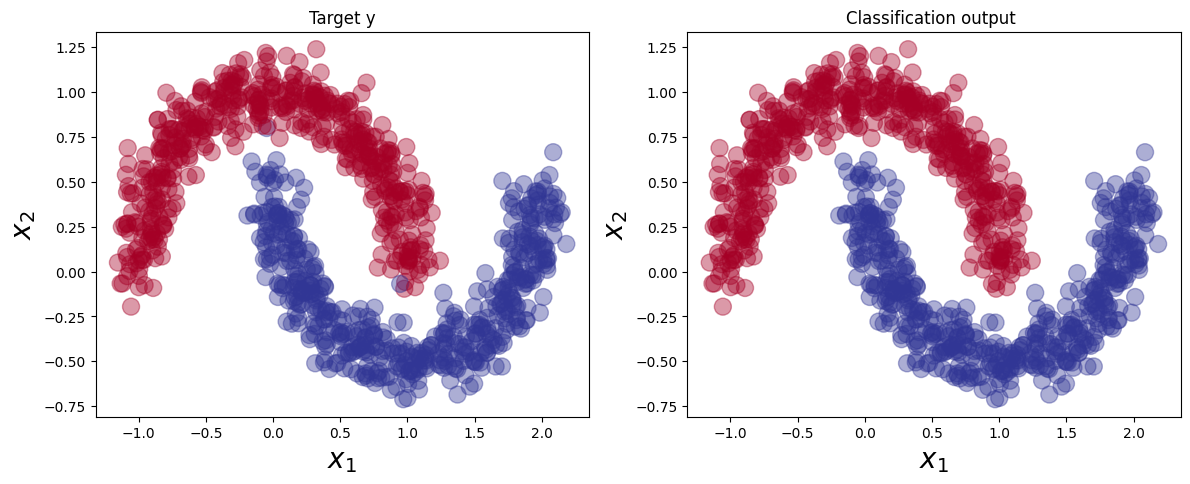

In [14]:
y_pred=model.predict(X_data)
import matplotlib.pyplot as plt
import matplotlib  # Make sure to import this

y_pred = model.predict(X_data)a,ue
f, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=matplotlib.colormaps['RdYlBu'])
ax[0].set_xlabel('$x_1$', fontsize=20)
ax[0].set_ylabel('$x_2$', fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=matplotlib.colormaps['RdYlBu'])
ax[1].set_xlabel('$x_1$', fontsize=20)
ax[1].set_ylabel('$x_2$', fontsize=20)
ax[1].set_title('Classification output ')
plt.tick_params(labelsize=10)